#Importation des modules nécessaires

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fr Jun 12 12:25:11 2019

@author: Hamdi
"""
import tensorflow as tf
import pickle
import numpy as np


#Connexion avec Google Drive 


Afin d'accéder facilement au dataset , je trouve que c'est plus facile de l'importer sur Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Set root path to /content/gdrive/dataset_street_signs
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/datasets_street_signs/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Importation des données


In [0]:
training_file = 'gdrive/My Drive/datasets_street_signs/train.p'
validation_file = 'gdrive/My Drive/datasets_street_signs/valid.p'
testing_file = 'gdrive/My Drive/datasets_street_signs/test.p'

with open(testing_file, mode='rb') as f:
  test = pickle.load(f)
print("Testing file pickled successfully")
with open(validation_file, mode='rb') as f:
  valid = pickle.load(f)
print("Validation file pickled successfully")

with open(training_file, mode='rb') as f:
   train = pickle.load(f)
print("training file pickled successfully")
    



Testing file pickled successfully
Validation file pickled successfully
training file pickled successfully


#Exploration des données

On fait la correspendance avec ce tableau csv:


In [0]:
import pandas
df = pandas.read_csv('signnames.csv')
print(df)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
#Exploring the dataset
#print(type (train))
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid,y_valid=valid['features'], valid['labels']
print(type(X_train))


num_train, img_height, img_width, img_depth = train['features'].shape

print("Number of training examples {}".format(num_train))
print("Number of test examples {}".format(len(X_test)))
print("Number of test examples {}".format(len(X_valid)))

print()

<class 'numpy.ndarray'>
Number of training examples 34799
Number of test examples 12630
Number of test examples 4410



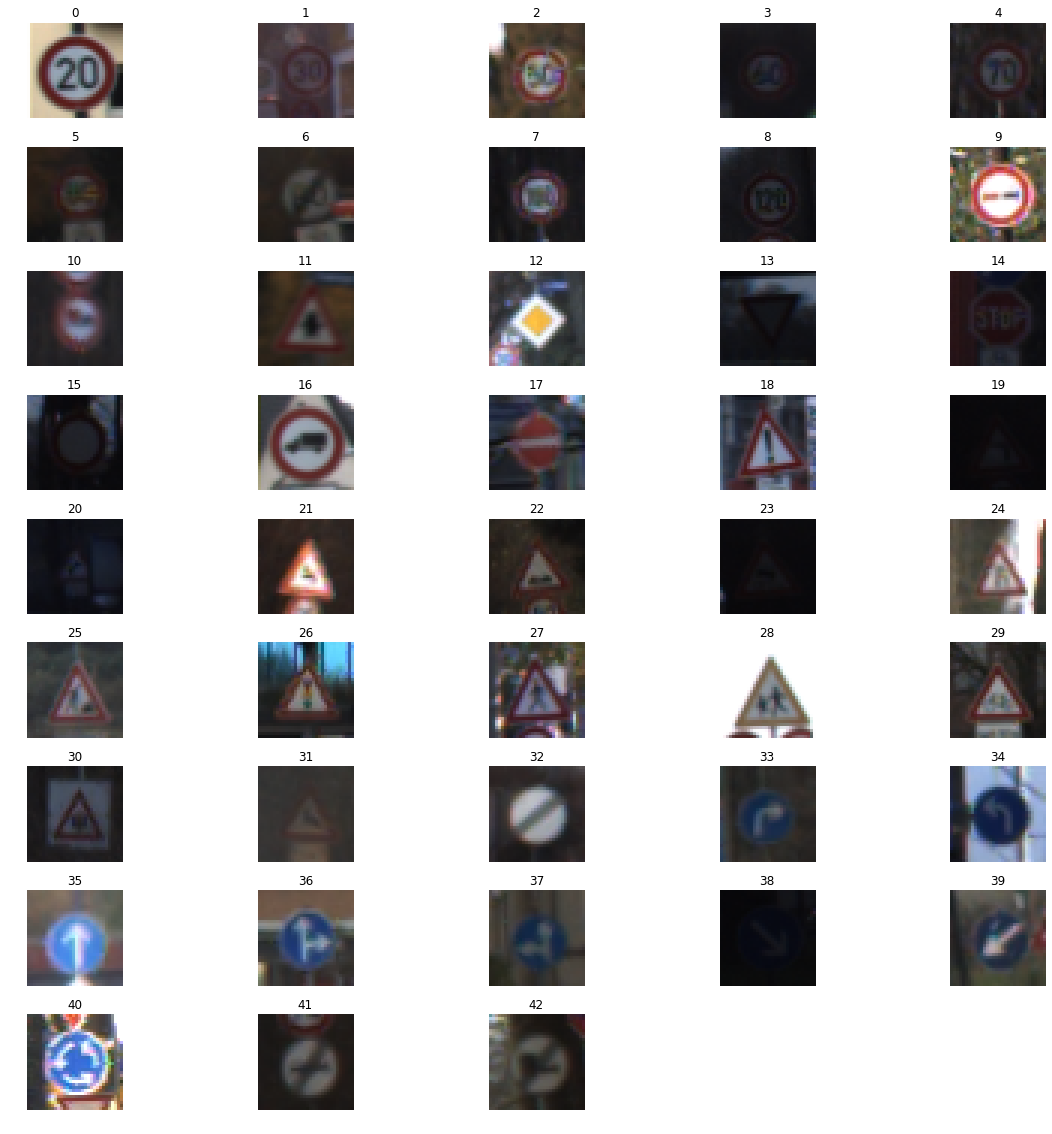

In [0]:
#Affichage

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib inline

signs = dict.fromkeys(range(0, 43))
for k in signs:
    indices = np.where(y_train==k)[0] 
    if indices.any():
        signs[k] = X_train[indices.item(0)]
      #  continue
    #indices = np.where(y_valid==k)[0] 
    #if indices.any():
     #   signs[k] = X_valid[indices.item(0)]
      #  continue
    #indices = np.where(y_test==k)[0] 
    #if indices.any():
     #   signs[k] = X_test[indices.item(0)]
      
plt.figure(figsize=(20, 20))
for code, image in signs.items():
    plt.subplot(9, 5, code+1)
    plt.axis("off")
    plt.subplots_adjust(hspace=0.3)
    plt.title(str(code))
    plt.imshow(image)    

#Normalisation des données


In [0]:
#Normalize the data
X_train = ( ( X_train - 127.5 ) / 127.5)
X_test=( ( X_test - 127.5) / 127.5 )
X_valid=( ( X_valid - 127.5) / 127.5 )

W0617 21:27:10.266839 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.281170 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.296549 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.311619 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.324492 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.339068 140572886054784 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0617 21:27:10.357657 140572

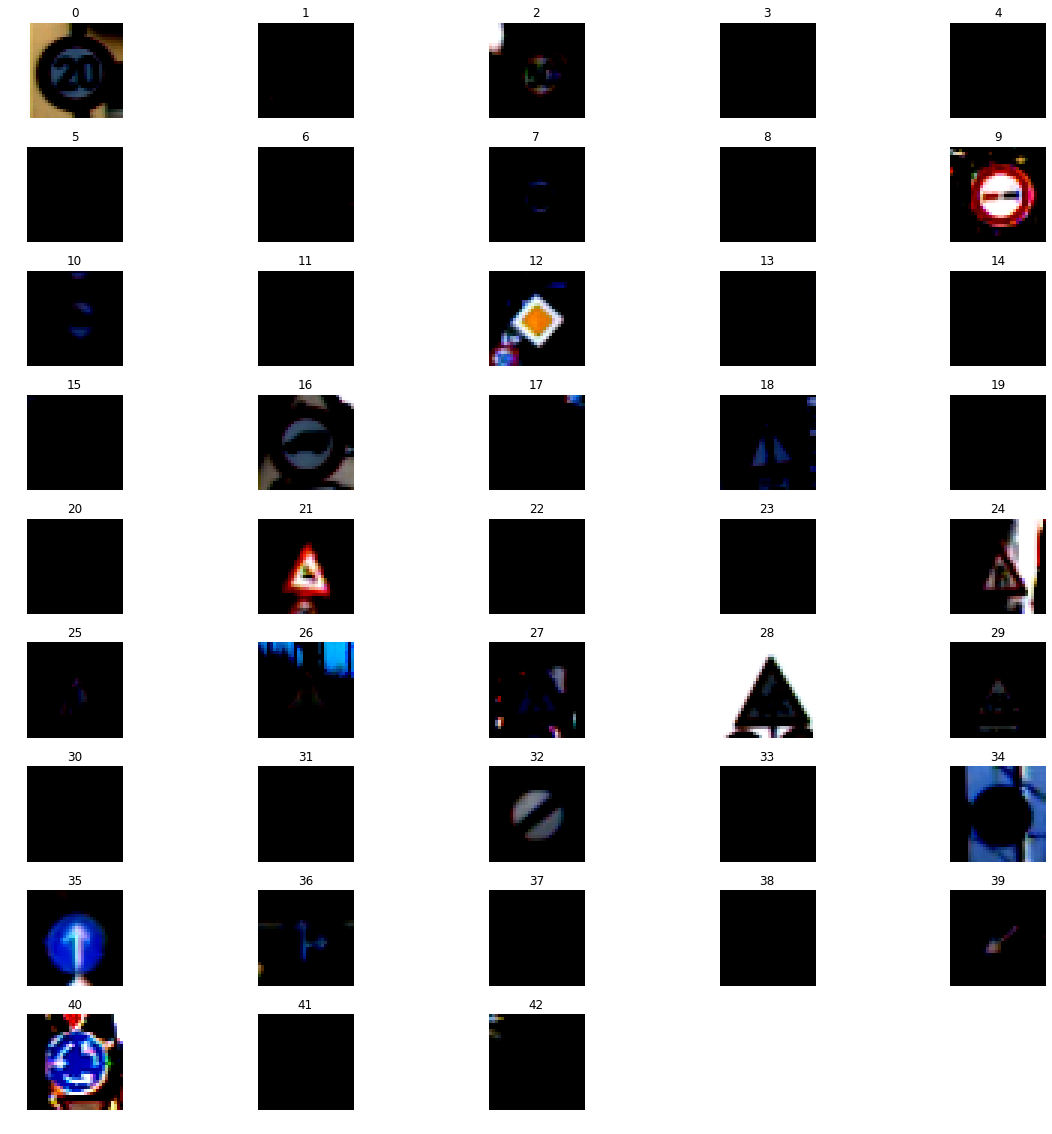

In [0]:
#Affichage aprés normalisation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib inline

signs = dict.fromkeys(range(0, 43))
for k in signs:
    indices = np.where(y_train==k)[0] 
    if indices.any():
        signs[k] = X_train[indices.item(0)]
      
      
plt.figure(figsize=(20, 20))
for code, image in signs.items():
    plt.subplot(9, 5, code+1)
    plt.axis("off")
    plt.subplots_adjust(hspace=0.3)
    plt.title(str(code))
    plt.imshow(image)

plt.savefig("image.jpg")




#Création du modèle et entrainement


In [0]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
#Firstlayers
x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)
#one more block
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
#One more block
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
# softmax activation, 43 categories
predictions = Dense(43, activation='softmax')(x)
model = Model(input=inputs, output=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, nb_epoch=10, validation_data=(X_valid, y_valid), shuffle=True,batch_size=256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 4s 106us/step - loss: 2.5575 - acc: 0.2888 - val_loss: 1.4552 - val_acc: 0.5542
Epoch 2/10
34799/34799 [==============================] - 3s 73us/step - loss: 0.8940 - acc: 0.7126 - val_loss: 0.6454 - val_acc: 0.8116
Epoch 3/10
34799/34799 [==============================] - 3s 73us/step - loss: 0.4223 - acc: 0.8669 - val_loss: 0.4485 - val_acc: 0.8658
Epoch 4/10
34799/34799 [==============================] - 3s 73us/step - loss: 0.2720 - acc: 0.9120 - val_loss: 0.3713 - val_acc: 0.8973
Epoch 5/10
34799/34799 [==============================] - 3s 74us/step - loss: 0.1918 - acc: 0.9384 - val_loss: 0.3331 - val_acc: 0.9079
Epoch 6/10
34799/34799 [==============================] - 3s 74us/step - loss: 0.1561 - acc: 0.9505 - val_loss: 0.2679 - val_acc: 0.9270
Epoch 7/10
34799/34799 [==============================] - 3s 73us/step - loss: 0.1241 - acc: 0.9616 - val_loss: 0.2915 - val_acc

In [0]:
metrics_test = model.evaluate(X_test,y_test,batch_size=200)

#print(model.metric_names)
#print("model accuracy on validation dataset is {}".format(metrics_validation[1]))

print("model accuracy on test dataset is {}".format(metrics_test[1]))




12630/12630 [==============================] - 0s 39us/step
model accuracy on test dataset is 0.9436262825228162


We Achieved using CNNs(Convolutional Neural Networks) 99.5% accuracy on the training dataset and a solid 88.97 on the test dataset!
**Awesome Result!**
Or so I though so, searching on the net, I figured out that my model was [overfitted](https://)




#Enregistrement du modele


In [0]:
import keras
filename = 'gdrive/My Drive/datasets_street_signs/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [0]:
model.save('gdrive/My Drive/datasets_street_signs/my_model.h5')
new_model = keras.models.load_model('my_model.h5')
print("Model Summary")
new_model.summary()


#Architecture du modele

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='gdrive/My Drive/datasets_street_signs/redmodel1.png')


#Testing Performance



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


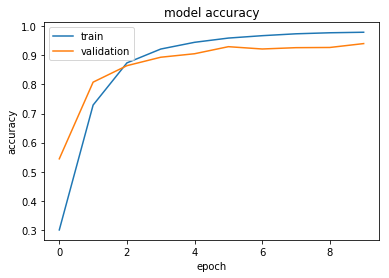

saved


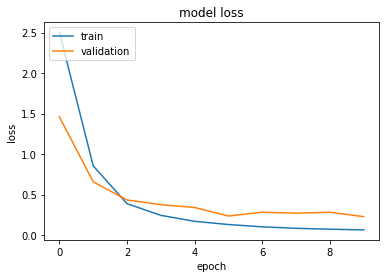

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig("gdrive/My Drive/datasets_street_signs/model_accuracy1.jpg")
print("saved")
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig("gdrive/My Drive/datasets_street_signs/model_loss1.jpg")




#Autres Tests





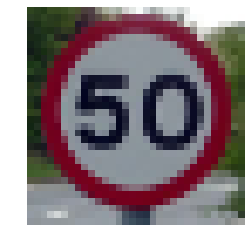

2


In [0]:
from PIL import Image # imports the library
original = Image.open("50_speed_limit.png")
img = np.asarray(original)
plt.axis("off")
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
predictions = model.predict(img);
print(np.argmax(predictions[0]))

Correct the second picture represents the 50 speed limit sign.


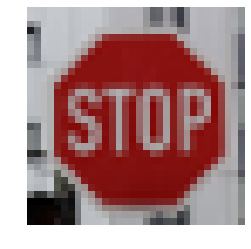

14


In [0]:
original = Image.open("stop_sign.png")

img = np.asarray(original)
plt.axis("off")
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
predictions = model.predict(img);
print(np.argmax(predictions[0]))

**Correct** 


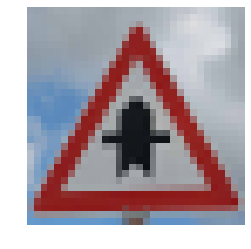

Predicted Answer =11


In [0]:
original = Image.open("intersection.png")
img = np.asarray(original)
plt.axis("off")
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
predictions = model.predict(img);
print("Predicted Answer ={}".format(np.argmax(predictions[0])))

**Correct**

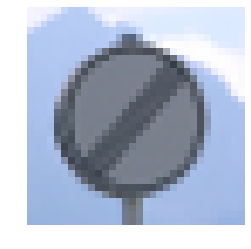

Predicted Answer =3


In [0]:
original = Image.open("end_of_speed_limit.png")
img = np.asarray(original)
plt.axis("off")
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
predictions = model.predict(img);
print("Predicted Answer ={}".format(np.argmax(predictions[0])))



---
**WRONG Predicition.**
Correct Answer is 32.

---




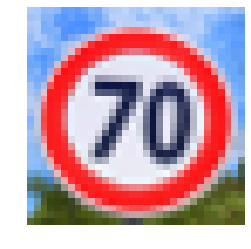

Predicted Answer =4


In [0]:
original = Image.open("speed_limit_70.png")
img = np.asarray(original)
plt.axis("off")
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
predictions = model.predict(img);
print("Predicted Answer ={}".format(np.argmax(predictions[0])))

Correct Answer is 4.


#Conclusion
this model predicted 4 out of 5 correct predicitons which is good enough!